In [1]:
import pandas as pd
from sklearn import preprocessing

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.decomposition import PCA

In [5]:
train_df = pd.read_csv("wat-time-interval-10000.csv")

In [6]:
train_df.head()

,time_intervals,r0,r1,r2,r3,r4,r5,r6,r7,r8,...,inport_east,inport_west,outport_local,outport_north,outport_south,outport_east,outport_west,target,tot_packets,tot_mean
0,10000,613,194,105,48,385,110,105,70,264,...,179,200,613,179,200,699,712,1,2391,159.400000
1,10000,675,825,201,95,445,521,179,117,300,...,351,393,1246,351,393,1486,1077,0,4505,300.333333
2,20000,707,860,384,171,419,406,182,76,207,...,453,548,1215,453,548,1067,1084,0,4295,286.333333
3,20000,629,266,202,89,337,122,129,50,175,...,232,327,629,232,327,540,699,1,2397,159.800000
4,30000,672,266,172,86,316,108,80,65,200,...,293,362,672,293,362,553,586,1,2436,162.400000


In [7]:
train_X = train_df.drop(columns=['time_intervals','target'])

In [8]:
train_X

,r0,r1,r2,r3,r4,r5,r6,r7,r8,r9,...,inport_south,inport_east,inport_west,outport_local,outport_north,outport_south,outport_east,outport_west,tot_packets,tot_mean
0,613,194,105,48,385,110,105,70,264,153,...,711,179,200,613,179,200,699,712,2391,159.400000
1,675,825,201,95,445,521,179,117,300,423,...,1076,351,393,1246,351,393,1486,1077,4505,300.333333
2,707,860,384,171,419,406,182,76,207,264,...,1085,453,548,1215,453,548,1067,1084,4295,286.333333
3,629,266,202,89,337,122,129,50,175,86,...,700,232,327,629,232,327,540,699,2397,159.800000
4,672,266,172,86,316,108,80,65,200,78,...,586,293,362,672,293,362,553,586,2436,162.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,559,229,168,102,329,90,96,72,239,59,...,417,498,403,558,498,404,508,417,2349,156.600000
626,486,282,228,120,192,66,102,84,109,55,...,459,312,474,486,312,474,301,459,1996,133.066667
627,503,269,198,114,210,72,90,96,126,66,...,450,324,449,504,324,448,324,450,2014,134.266667
628,747,369,288,198,366,134,114,90,204,98,...,618,496,621,746,497,621,492,618,2938,195.866667


In [9]:
x = train_X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)

In [10]:
corr_df = pd.concat([train_X, train_df[['target']]], axis = 1)
corr_df.corr()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,target
0,1.000000,0.880315,0.921483,0.843099,0.967894,0.779053,0.893604,0.843027,0.948662,0.827457,...,0.951722,0.968819,0.970715,0.951749,0.968830,0.920094,0.955349,0.974987,0.974987,-0.005309
1,0.880315,1.000000,0.928026,0.874358,0.838893,0.902357,0.820267,0.800133,0.806011,0.886674,...,0.851538,0.916082,0.956777,0.851558,0.916106,0.901163,0.949885,0.938291,0.938291,-0.053992
2,0.921483,0.928026,1.000000,0.914807,0.862259,0.758288,0.834735,0.780864,0.838658,0.790391,...,0.870375,0.960831,0.936627,0.870393,0.960823,0.854758,0.950103,0.935989,0.935989,-0.020834
3,0.843099,0.874358,0.914807,1.000000,0.772269,0.739808,0.683599,0.837076,0.754123,0.764939,...,0.803435,0.930476,0.853811,0.803472,0.930422,0.780908,0.911616,0.872597,0.872597,-0.018737
4,0.967894,0.838893,0.862259,0.772269,1.000000,0.819686,0.936351,0.847388,0.979600,0.859911,...,0.968424,0.919094,0.957128,0.968449,0.919087,0.957746,0.927126,0.967581,0.967581,-0.007652
5,0.779053,0.902357,0.758288,0.739808,0.819686,1.000000,0.807417,0.811944,0.765015,0.908614,...,0.807444,0.791908,0.883655,0.807479,0.791940,0.901946,0.862834,0.871561,0.871561,-0.061772
6,0.893604,0.820267,0.834735,0.683599,0.936351,0.807417,1.000000,0.777446,0.885505,0.782777,...,0.897488,0.850631,0.916264,0.897516,0.850628,0.905419,0.869793,0.910754,0.910754,-0.019972
7,0.843027,0.800133,0.780864,0.837076,0.847388,0.811944,0.777446,1.000000,0.831592,0.820263,...,0.872173,0.890207,0.848743,0.872176,0.890231,0.849886,0.878714,0.882269,0.882269,-0.014347
8,0.948662,0.806011,0.838658,0.754123,0.979600,0.765015,0.885505,0.831592,1.000000,0.871686,...,0.971760,0.904992,0.929269,0.971748,0.904972,0.952092,0.906372,0.952459,0.952459,-0.001649
9,0.827457,0.886674,0.790391,0.764939,0.859911,0.908614,0.782777,0.820263,0.871686,1.000000,...,0.870498,0.839430,0.898408,0.870517,0.839438,0.947199,0.899543,0.911008,0.911008,-0.049409


In [11]:
train_Y = train_df['target']

In [12]:
train_Y

0      1
1      0
2      0
3      1
4      1
      ..
625    1
626    0
627    1
628    1
629    0
Name: target, Length: 630, dtype: int64

In [13]:
model = Sequential()

In [14]:
n_cols = train_X.shape[1]
n_cols

32

In [15]:
model.add(Dense(16, activation='relu', input_shape=(n_cols,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

In [17]:
early_stopping_monitor = EarlyStopping(patience=5)

In [18]:
model.fit(train_X, train_Y, epochs=11, validation_split=0.9, callbacks=[early_stopping_monitor])

Train on 62 samples, validate on 568 samples
Epoch 1/11
62/62 [==============================] - 1s 9ms/step - loss: 0.2582 - accuracy: 0.5000 - val_loss: 0.2500 - val_accuracy: 0.4877
Epoch 2/11
62/62 [==============================] - 0s 414us/step - loss: 0.2578 - accuracy: 0.4677 - val_loss: 0.2499 - val_accuracy: 0.4877
Epoch 3/11
62/62 [==============================] - 0s 458us/step - loss: 0.2575 - accuracy: 0.4839 - val_loss: 0.2499 - val_accuracy: 0.4912
Epoch 4/11
62/62 [==============================] - 0s 457us/step - loss: 0.2571 - accuracy: 0.4839 - val_loss: 0.2499 - val_accuracy: 0.4965
Epoch 5/11
62/62 [==============================] - 0s 500us/step - loss: 0.2567 - accuracy: 0.4516 - val_loss: 0.2499 - val_accuracy: 0.5035
Epoch 6/11
62/62 [==============================] - 0s 437us/step - loss: 0.2564 - accuracy: 0.4516 - val_loss: 0.2498 - val_accuracy: 0.5106
Epoch 7/11
62/62 [==============================] - 0s 390us/step - loss: 0.2562 - accuracy: 0.5000 - val

In [19]:
pred = model.predict(train_X)

In [20]:
for i in range(100):
    print("%s, %s" % (pred[i], train_Y[i]))

[0.5312084], 1
[0.60701454], 0
[0.5745477], 0
[0.5392393], 1
[0.54078215], 1
[0.5917756], 0
[0.5424941], 1
[0.5731483], 0
[0.5078099], 1
[0.5334772], 0
[0.5321795], 0
[0.52892166], 1
[0.57510674], 0
[0.5209706], 1
[0.47567695], 0
[0.47758237], 1
[0.5098469], 0
[0.52366406], 1
[0.49425402], 0
[0.4930328], 1
[0.4909404], 0
[0.49737042], 1
[0.5200422], 0
[0.5154869], 1
[0.5023351], 1
[0.48712125], 0
[0.48930284], 1
[0.4914095], 0
[0.48737836], 0
[0.50134146], 1
[0.5007277], 0
[0.50170285], 1
[0.49653998], 1
[0.5013529], 0
[0.50661314], 1
[0.5006046], 0
[0.5011329], 0
[0.50091493], 1
[0.49561423], 0
[0.49567387], 1
[0.4965696], 1
[0.5012371], 0
[0.49946064], 0
[0.49579704], 1
[0.5006046], 1
[0.49760163], 0
[0.50135124], 1
[0.51587296], 0
[0.5114503], 1
[0.5081869], 0
[0.50972253], 0
[0.5054434], 1
[0.4965696], 0
[0.50526625], 1
[0.50273174], 0
[0.49520078], 1
[0.50070244], 0
[0.50170285], 1
[0.49653998], 1
[0.5001148], 0
[0.50661314], 1
[0.5009712], 0
[0.5026751], 1
[0.4996968], 0
[0.50649

In [21]:
pca = PCA(n_components = 2)

In [22]:
pca.fit(train_X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [23]:
principal_components = pca.transform(train_X)
principal_components

array([[ 1.42274132, -0.48488112],
       [ 3.04674493, -0.44801   ],
       [ 2.97389447, -0.05414932],
       ...,
       [ 1.21177165,  0.18454936],
       [ 2.06891045,  0.16933166],
       [ 2.02289304,  0.01123124]])

In [24]:
pca.explained_variance_ratio_

array([0.89532433, 0.02839152])

In [25]:
features = range(pca.n_components_)

Text(0, 0.5, 'Variance')

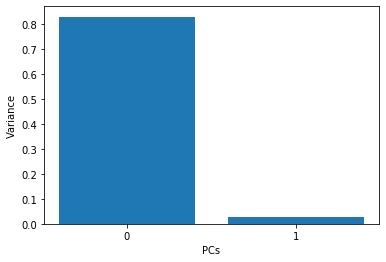

In [26]:
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel("PCs")
plt.ylabel("Variance")

In [27]:
principal_df = pd.DataFrame(data = principal_components , columns = ['pc 1', 'pc 2'])
principal_df

,pc 1,pc 2
0,1.422741,-0.484881
1,3.046745,-0.448010
2,2.973894,-0.054149
3,1.444013,-0.256094
4,1.539798,-0.223460
...,...,...
625,1.626957,-0.278583
626,1.194475,0.205759
627,1.211772,0.184549
628,2.068910,0.169332


In [28]:
final_df = pd.concat([principal_df, train_df[['target']]], axis = 1)
final_df

,pc 1,pc 2,target
0,1.422741,-0.484881,1
1,3.046745,-0.448010,0
2,2.973894,-0.054149,0
3,1.444013,-0.256094,1
4,1.539798,-0.223460,1
...,...,...,...
625,1.626957,-0.278583,1
626,1.194475,0.205759,0
627,1.211772,0.184549,1
628,2.068910,0.169332,1


In [29]:
final_df.corr()

,pc 1,pc 2,target
pc 1,1.000000e+00,4.802458e-15,-0.016670
pc 2,4.802458e-15,1.000000e+00,-0.016496
target,-1.667040e-02,-1.649636e-02,1.000000


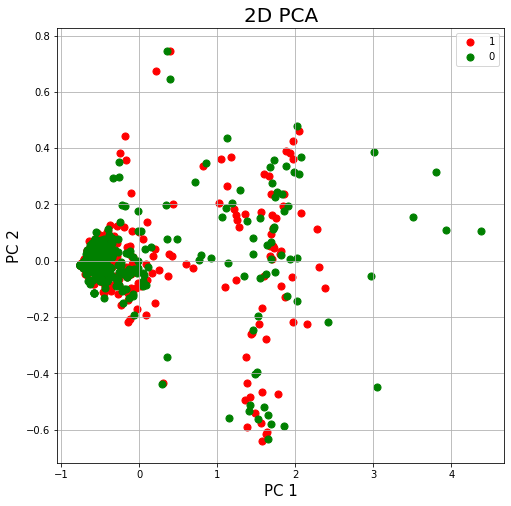

In [30]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'pc 1']
               , final_df.loc[indicesToKeep, 'pc 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

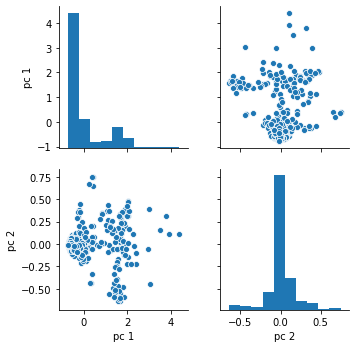

In [31]:
sns.pairplot(final_df.loc[:,final_df.dtypes == 'float64'])

In [32]:
corr_df

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,target
0,0.720000,0.179298,0.197368,0.186047,0.753425,0.211132,0.475113,0.312500,0.880000,0.361702,...,0.174805,0.215285,0.406768,0.174976,0.215517,0.470390,0.656827,0.429624,0.429624,1
1,0.792941,0.762477,0.377820,0.368217,0.870841,1.000000,0.809955,0.522321,1.000000,1.000000,...,0.342773,0.423036,0.826808,0.343109,0.423491,1.000000,0.993542,0.809635,0.809635,0
2,0.830588,0.794824,0.721805,0.662791,0.819961,0.779271,0.823529,0.339286,0.690000,0.624113,...,0.442383,0.589882,0.806238,0.442815,0.590517,0.718035,1.000000,0.771886,0.771886,0
3,0.738824,0.245841,0.379699,0.344961,0.659491,0.234165,0.583710,0.223214,0.583333,0.203310,...,0.226562,0.351991,0.417386,0.226784,0.352371,0.363392,0.644834,0.430703,0.430703,1
4,0.789412,0.245841,0.323308,0.333333,0.618395,0.207294,0.361991,0.290179,0.666667,0.184397,...,0.286133,0.389666,0.445919,0.286413,0.390086,0.372140,0.540590,0.437713,0.437713,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,0.656471,0.211645,0.315789,0.395349,0.643836,0.172745,0.434389,0.321429,0.796667,0.139480,...,0.486328,0.433800,0.370272,0.486804,0.435345,0.341857,0.384686,0.422074,0.422074,1
626,0.570588,0.260628,0.428571,0.465116,0.375734,0.126679,0.461538,0.375000,0.363333,0.130024,...,0.304688,0.510226,0.322495,0.304985,0.510776,0.202557,0.423432,0.358619,0.358619,0
627,0.590588,0.248614,0.372180,0.441860,0.410959,0.138196,0.407240,0.428571,0.420000,0.156028,...,0.316406,0.483315,0.334439,0.316716,0.482759,0.218035,0.415129,0.361855,0.361855,1
628,0.877647,0.341035,0.541353,0.767442,0.716243,0.257198,0.515837,0.401786,0.680000,0.231678,...,0.484375,0.668461,0.495023,0.485826,0.669181,0.331090,0.570111,0.527953,0.527953,1


In [33]:
corr_df[corr_df.duplicated()].shape

(71, 33)

In [34]:
dup_df = train_df.drop(columns=['time_intervals'])
dup_df

,r0,r1,r2,r3,r4,r5,r6,r7,r8,r9,...,inport_east,inport_west,outport_local,outport_north,outport_south,outport_east,outport_west,target,tot_packets,tot_mean
0,613,194,105,48,385,110,105,70,264,153,...,179,200,613,179,200,699,712,1,2391,159.400000
1,675,825,201,95,445,521,179,117,300,423,...,351,393,1246,351,393,1486,1077,0,4505,300.333333
2,707,860,384,171,419,406,182,76,207,264,...,453,548,1215,453,548,1067,1084,0,4295,286.333333
3,629,266,202,89,337,122,129,50,175,86,...,232,327,629,232,327,540,699,1,2397,159.800000
4,672,266,172,86,316,108,80,65,200,78,...,293,362,672,293,362,553,586,1,2436,162.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,559,229,168,102,329,90,96,72,239,59,...,498,403,558,498,404,508,417,1,2349,156.600000
626,486,282,228,120,192,66,102,84,109,55,...,312,474,486,312,474,301,459,0,1996,133.066667
627,503,269,198,114,210,72,90,96,126,66,...,324,449,504,324,448,324,450,1,2014,134.266667
628,747,369,288,198,366,134,114,90,204,98,...,496,621,746,497,621,492,618,1,2938,195.866667


In [35]:
dup_df[dup_df.duplicated()].shape

(71, 33)

In [36]:
dup_df[dup_df.duplicated()].count()

r0               71
r1               71
r2               71
r3               71
r4               71
r5               71
r6               71
r7               71
r8               71
r9               71
r10              71
r11              71
r12              71
r13              71
r14              71
r15              71
pkt_get          71
pkt_data         71
pkt_put          71
pkt_ack          71
inport_local     71
inport_north     71
inport_south     71
inport_east      71
inport_west      71
outport_local    71
outport_north    71
outport_south    71
outport_east     71
outport_west     71
target           71
tot_packets      71
tot_mean         71
dtype: int64

In [37]:
print ((71/630)*100)

11.26984126984127
